In [ ]:
# Base Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from numpy import set_printoptions
from numpy import mean
from sklearn import linear_model
import sys
from termcolor import colored, cprint

# Models
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.ensemble import VotingClassifier
#from sklearn.ensemble import StackingClassifier
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import log_loss

#import scikitplot as skplt


In [ ]:
#preprocessing
#Read dataset
df=pd.read_csv(r"/content/Cardio_train.csv")

FileNotFoundError: ignored

In [ ]:
df.head() ## Print Top five row of the dataset.

In [ ]:
df.shape

(69999, 12)

In [ ]:
# check duplicate value in the dataset
df.duplicated().any()

False

In [ ]:
# check null value in the dataset
df.isnull().values.any()# to find null value in creditcard dataset

False

In [ ]:
df.shape

(69999, 12)

In [ ]:
#total number of duplecate value that is delete

In [ ]:
df["age"]

0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
69994    19240
69995    22601
69996    19066
69997    22431
69998    20540
Name: age, Length: 69999, dtype: int64

In [ ]:
# convert age into years from days
df["age"]=(df["age"]/365)

In [ ]:
df["age"] = df["age"].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69999 non-null  int64  
 1   gender       69999 non-null  int64  
 2   height       69999 non-null  int64  
 3   weight       69999 non-null  float64
 4   ap_lo        69999 non-null  int64  
 5   ap_hi        69999 non-null  int64  
 6   cholesterol  69999 non-null  int64  
 7   gluc         69999 non-null  int64  
 8   smoke        69999 non-null  int64  
 9   alco         69999 non-null  int64  
 10  active       69999 non-null  int64  
 11  cardio       69999 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [ ]:
df

,age,gender,height,weight,ap_lo,ap_hi,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,78,120,1,1,0,0,1,0
1,55,1,156,85.0,90,140,3,1,1,0,1,1
2,51,1,165,64.0,70,130,3,1,1,0,0,1
3,48,1,169,82.0,100,150,3,1,1,0,1,1
4,47,1,156,56.0,60,100,3,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69994,52,2,168,76.0,78,111,1,1,1,0,1,0
69995,61,1,158,126.0,90,123,2,2,0,0,1,1
69996,52,2,183,105.0,90,109,3,1,0,1,0,1
69997,61,1,163,72.0,80,105,1,2,0,0,0,1


In [ ]:
df.describe()

,age,gender,height,weight,ap_lo,ap_hi,cholesterol,gluc,smoke,alco,active,cardio
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,52.840598,1.347534,164.359277,74.205893,94.249075,112.511093,1.374591,1.100273,0.239975,0.053786,0.802497,0.501936
std,6.766794,0.476190,8.210140,14.395759,154.674388,7.519033,0.687872,0.637495,0.427071,0.225597,0.398118,0.500000
min,29.000000,1.000000,55.000000,10.000000,-70.000000,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,79.000000,106.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,80.000000,113.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,82.000000,81.000000,119.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,11000.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
z=(df-df.mean())/df.std()  #to check outlayers i each feATURE
t=3
o=np.abs(z)>t  #ABOSULTE VALUE
print(o.sum())

age               4
gender            0
height          293
weight          702
ap_lo           804
ap_hi             6
cholesterol       0
gluc              0
smoke             0
alco           3765
active            0
cardio            0
dtype: int64


In [ ]:
#outlier handing for heights
print("Highest allowed",df['height'].mean() + 3*df['height'].std()) #IF DEPENDS HOW THE RANGE IS REFLECTED LIKE WHAT VALUES WE WANT FOR OUTLINER.
print("Lowest allowed",df['height'].mean() - 3*df['height'].std())




Highest allowed 188.9896977335207
Lowest allowed 139.72885538866677


In [ ]:
df[(df['height'] > 189) | (df['height'] < 140)]

,age,gender,height,weight,ap_lo,ap_hi,cholesterol,gluc,smoke,alco,active,cardio
224,59,1,76,55.0,80,105,3,2,1,0,1,1
1027,41,2,195,111.0,86,120,1,1,1,0,1,1
1117,60,2,198,68.0,80,118,1,1,1,0,1,1
2160,44,2,196,74.0,90,113,1,1,1,1,1,1
2412,61,2,138,52.0,100,115,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
67971,59,2,195,90.0,80,120,1,1,0,0,0,0
69051,55,2,120,80.0,90,100,1,2,0,0,1,1
69123,43,2,138,60.0,79,114,1,1,0,0,0,0
69215,60,1,190,87.0,79,100,1,1,0,0,0,0


In [ ]:
new_df = df[(df['height'])< 189 & (df['height'] > 140)]


In [ ]:
new_df.shape

(0, 12)

In [ ]:
upper_limit = df['height'].mean() + 3*df['height'].std()
lower_limit = df['height'].mean() - 3*df['height'].std()

In [ ]:
print(upper_limit)
print(lower_limit)

188.9896977335207
139.72885538866677


Capping is another technique for dealing with bad data points; it is useful when we have many outliers, and removing a good amount of data from the dataset is not good. In that case, capping comes into the picture as it won’t remove them. Instead, it brings back those data points within the range we specified according to our Z-Score value.

In [ ]:
df['height'] = np.where(
    df['height']>upper_limit,
    upper_limit,
    np.where(
        df['height']<lower_limit,
        lower_limit,
        df['height']))

In [ ]:
#outlier handing for weight
print("Highest allowed",df['weight'].mean() + 3*df['weight'].std())
print("Lowest allowed",df['weight'].mean() - 3*df['weight'].std())




Highest allowed 117.39317106474186
Lowest allowed 31.0186148179136


In [ ]:
upper_limit = df['weight'].mean() + 3*df['weight'].std()
lower_limit = df['weight'].mean() - 3*df['weight'].std()

In [ ]:
df['weight'] = np.where(
    df['weight']>upper_limit,
    upper_limit,
    np.where(
        df['weight']<lower_limit,
        lower_limit,
        df['weight']))


In [ ]:
# now outlier handling for ap_lo
upper_limit = df['ap_lo'].mean() + 3*df['ap_lo'].std()
lower_limit = df['ap_lo'].mean() - 3*df['ap_lo'].std()

In [ ]:
df['ap_lo'] = np.where(
    df['ap_lo']>upper_limit,
    upper_limit,
    np.where(
        df['ap_lo']<lower_limit,
        lower_limit,
        df['ap_lo']))


In [ ]:
# now outlier handling for'ap_hi'
upper_limit = df['ap_hi'].mean() + 3*df['ap_hi'].std()
lower_limit = df['ap_hi'].mean() - 3*df['ap_hi'].std()

In [ ]:
df['ap_hi'] = np.where(
    df['ap_hi']>upper_limit,
    upper_limit,
    np.where(
        df['ap_hi']<lower_limit,
        lower_limit,
        df['ap_hi']))


In [ ]:
# now outlier handling for'alco '
upper_limit = df['alco'].mean() + 3*df['alco'].std()
lower_limit = df['alco'].mean() - 3*df['alco'].std()

In [ ]:
df['alco'] = np.where(
    df['alco']>upper_limit,
    upper_limit,
    np.where(
        df['alco']<lower_limit,
        lower_limit,
        df['alco']))


**Exploratory Data Analysis (EDA)**






In [ ]:
df.shape

(69999, 12)

using Capping in Outlier handing we don't loose any  information/data.

In [ ]:
cardio=df["cardio"]
heart_disease=0
normal=0
for i in range (len(cardio)):
  if cardio[i]==0:
    normal=normal+1
  else:
    heart_disease=heart_disease+1
print("noraml patient:",normal)
print("heart disease/cardio patient:",heart_disease)

noraml patient: 34864
heart disease/cardio patient: 35135


<Axes: xlabel='cardio', ylabel='count'>

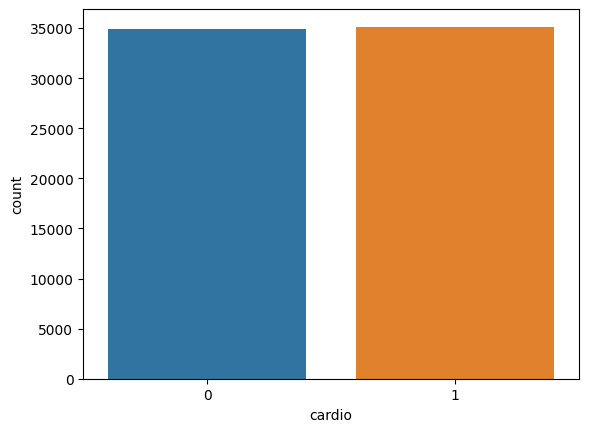

In [ ]:
#print graph according the diagnosis(Target) 0= Benign , 1= Maligant
import seaborn as sns
sns.countplot(x='cardio',data=df)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_lo'}>,
        <Axes: title={'center': 'ap_hi'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>],
       [<Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>,
        <Axes: title={'center': 'cardio'}>]], dtype=object)

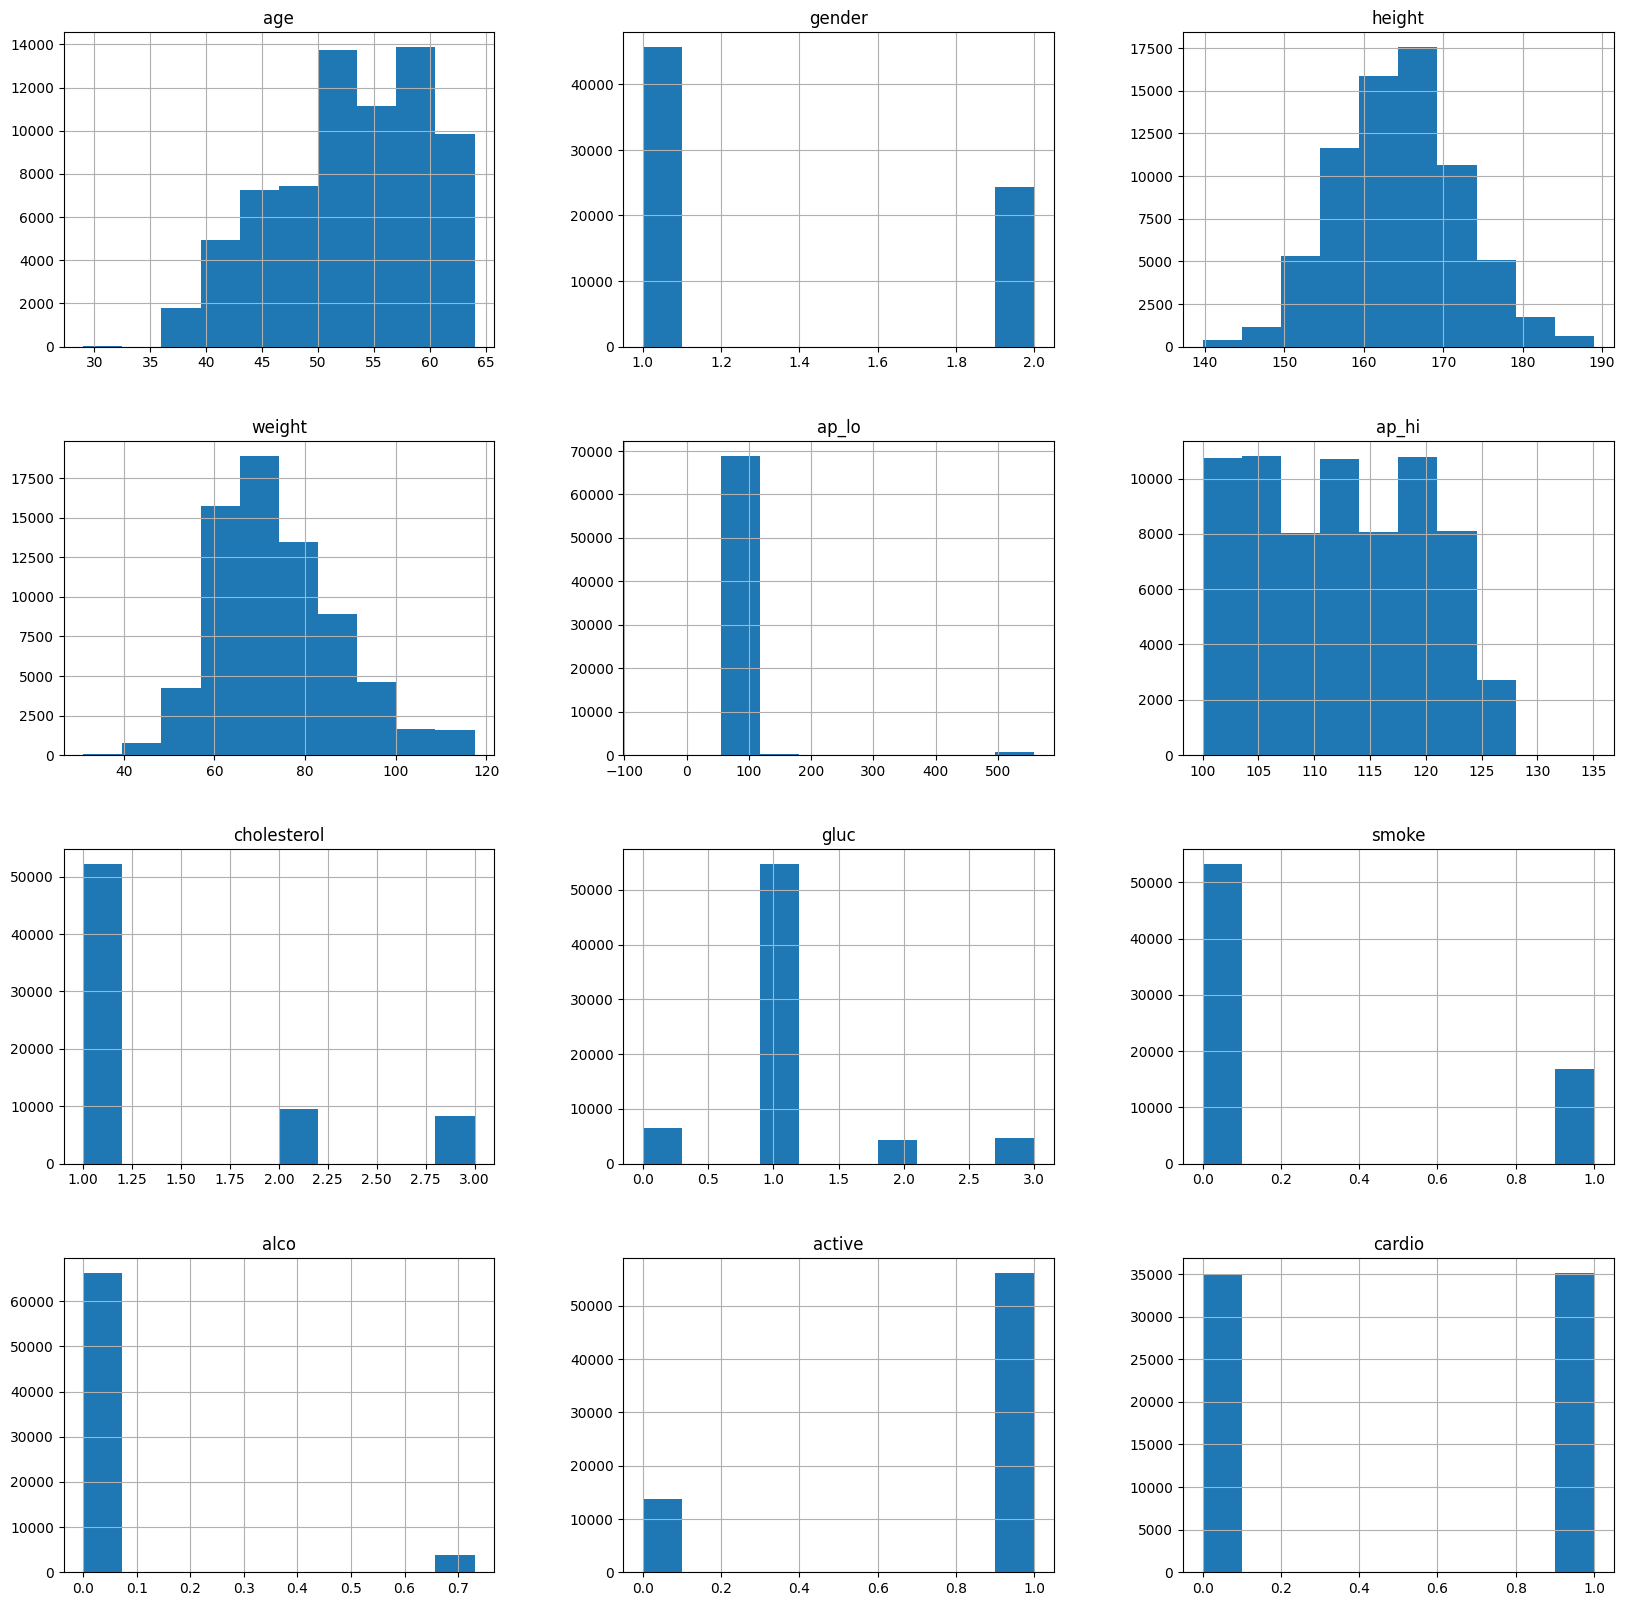

In [ ]:
df.hist(figsize=(20,20))##Plot a Historgram grah

<Axes: >

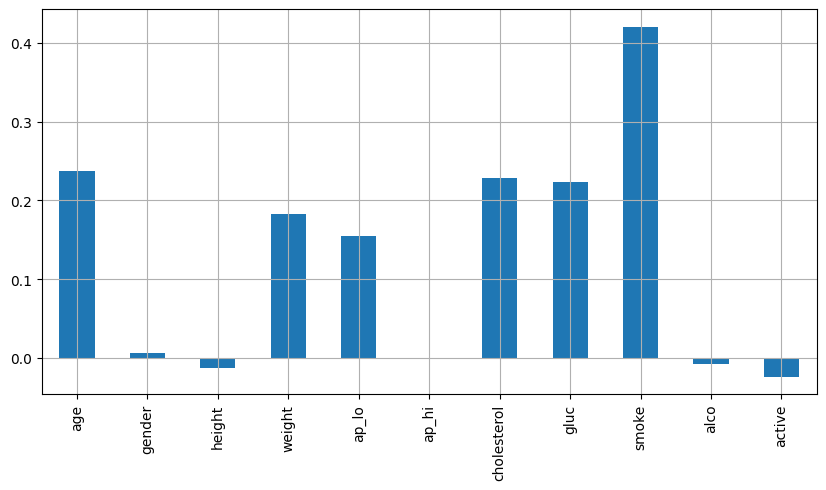

In [ ]:
# feature selection using correalation
# feature selection with the help of correlation
df.drop('cardio',axis=1).corrwith(df.cardio).plot(kind='bar',figsize=(10,5),grid=True)

In [ ]:
#visulization of top feature related to heart_disease.


In [ ]:
#age
countg=0
tgcountg=0
age=df["age"]
cardio=df["cardio"]
for i in range(len(df)):
    if age[i]>=29  and age[i]<40:
        countg=countg+1
        if cardio[i]==1:
            tgcountg=tgcountg+1
    #    print("i")


print(f"{countg}   patient age  in range(30-40) and heart disease patient:{tgcountg}")
p1g=(tgcountg/countg)*100
print(f"{round(p1g)}%  Patient have heart disease problem")
print("_____________________________________________________")
count1g=0
tg1countg=0
cardio=df["cardio"]

for i in range(len(df)):
    if age[i]>=40  and age[i]<50:
        count1g=count1g+1
        if cardio[i]==1:
            tg1countg=tg1countg+1
    #    print("i")


print(f"{count1g} patient age in range(40-50) and heart disease patient:{tg1countg}")
p2g=(tg1countg/count1g)*100
print(f"{round(p2g)}%  Patient have heart disease problem")
print("________________________________________________________")
count2g=0
tg2countg=0
for i in range(len(df)):
    if age[i]>=50  and age[i]<60:
        count2g=count2g+1
        if cardio[i]==1:
            tg2countg=tg2countg+1
    #    print("i")


print(f"{count2g}  patient age in range(50-60) and heart disease patient:{tg2countg}")
p2g=(tg2countg/count2g)*100
print(f"{round(p2g)}% Patient have heart disease problem")
print("________________________________________________________")
count3g=0
tg3countg=0
for i in range(len(df)):
    if age[i]>=60  and age[i]<=70:
        count3g=count3g+1
        if cardio[i]==1:
            tg3countg=tg3countg+1
    #    print("i")


print(f"{count3g}  patient age in range(60-70) and heart disease patient:{tg3countg}")
p3g=(tg3countg/count3g)*100
print(f"{round(p3g)}% Patient have heart disease problem")





1784   patient age  in range(30-40) and heart disease patient:439
25%  Patient have heart disease problem
_____________________________________________________
19625 patient age in range(40-50) and heart disease patient:7503
38%  Patient have heart disease problem
________________________________________________________
35540  patient age in range(50-60) and heart disease patient:18429
52% Patient have heart disease problem
________________________________________________________
13050  patient age in range(60-70) and heart disease patient:8764
67% Patient have heart disease problem


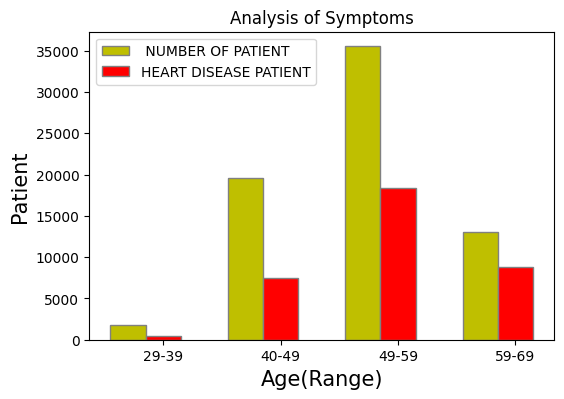

In [ ]:
# Visulization of the featres
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(6, 4))

# set height of bar
total_patient = [1784,19625,35540,13050]
heart_patient= [439,7503,18429,8764]


# Set position of bar on X axis
br1 = np.arange(len(total_patient))
br2 = [x + barWidth for x in br1]


# Make the plot
plt.bar(br1, total_patient, color ='y', width = barWidth,
        edgecolor ='grey', label =' NUMBER OF PATIENT')
plt.bar(br2, heart_patient, color ='r', width = barWidth,
        edgecolor ='grey', label ='HEART DISEASE PATIENT')


# Adding Xticks
plt.xlabel('Age(Range)',  fontsize = 15)
plt.ylabel('Patient',  fontsize = 15)
plt.xticks([r + barWidth for r in range(len(total_patient))],
        ['29-39','40-49','49-59','59-69'])
plt.title("Analysis of Symptoms")

plt.legend()
plt.show()


In [ ]:
#weight
countg=0
tgcountg=0
weight=df["weight"]
cardio=df["cardio"]
for i in range(len(df)):
    if weight[i]>=30  and weight[i]<50:
        countg=countg+1
        if cardio[i]==1:
            tgcountg=tgcountg+1
    #    print("i")


print(f"{countg}   patient weight  in range(30-50) and heart disease patient:{tgcountg}")
p1g=(tgcountg/countg)*100
print(f"{round(p1g)}%  Patient have heart disease problem")
print("_____________________________________________________")
count1g=0
tg1countg=0
cardio=df["cardio"]

for i in range(len(df)):
    if weight[i]>=50 and weight[i]<70:
        count1g=count1g+1
        if cardio[i]==1:
            tg1countg=tg1countg+1
    #    print("i")


print(f"{count1g} patient weight in range(50-70) and heart disease patient:{tg1countg}")
p2g=(tg1countg/count1g)*100
print(f"{round(p2g)}%  Patient have heart disease problem")
print("________________________________________________________")
count2g=0
tg2countg=0
for i in range(len(df)):
    if weight[i]>=70  and weight[i]<90:
        count2g=count2g+1
        if cardio[i]==1:
            tg2countg=tg2countg+1
    #    print("i")


print(f"{count2g}  patient weight in range(70-90) and heart disease patient:{tg2countg}")
p2g=(tg2countg/count2g)*100
print(f"{round(p2g)}% Patient have heart disease problem")
print("________________________________________________________")
count3g=0
tg3countg=0
for i in range(len(df)):
    if weight[i]>=90  and weight[i]<=118:
        count3g=count3g+1
        if cardio[i]==1:
            tg3countg=tg3countg+1
    #    print("i")


print(f"{count3g}  patient weight in range(90-118) and heart disease patient:{tg3countg}")
p3g=(tg3countg/count3g)*100
print(f"{round(p3g)}% Patient have heart disease problem")





987   patient weight  in range(30-50) and heart disease patient:276
28%  Patient have heart disease problem
_____________________________________________________
27863 patient weight in range(50-70) and heart disease patient:11722
42%  Patient have heart disease problem
________________________________________________________
31465  patient weight in range(70-90) and heart disease patient:16737
53% Patient have heart disease problem
________________________________________________________
9684  patient weight in range(90-118) and heart disease patient:6400
66% Patient have heart disease problem


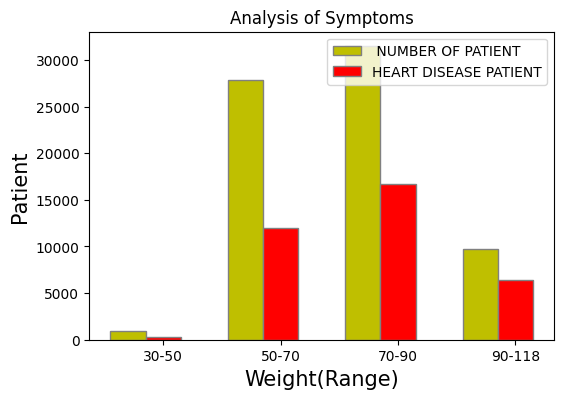

In [ ]:
# Visulization of the featres
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(6, 4))

# set height of bar
total_patient = [987,27863,31465,9684]
heart_patient= [276,11972,16737,6400]


# Set position of bar on X axis
br1 = np.arange(len(total_patient))
br2 = [x + barWidth for x in br1]


# Make the plot
plt.bar(br1, total_patient, color ='y', width = barWidth,
        edgecolor ='grey', label =' NUMBER OF PATIENT')
plt.bar(br2, heart_patient, color ='r', width = barWidth,
        edgecolor ='grey', label ='HEART DISEASE PATIENT')


# Adding Xticks
plt.xlabel('Weight(Range)',  fontsize = 15)
plt.ylabel('Patient',  fontsize = 15)
plt.xticks([r + barWidth for r in range(len(total_patient))],
        ['30-50','50-70','70-90','90-118'])
plt.title("Analysis of Symptoms")

plt.legend()
plt.show()


In [ ]:
#ap_lo
countg=0
tgcountg=0
ap_lo=df["ap_lo"]
cardio=df["cardio"]
for i in range(len(df)):
    if ap_lo[i]<70:
        countg=countg+1
        if cardio[i]==1:
            tgcountg=tgcountg+1
    #    print("i")


print(f"{countg}   patient ap_lo  in range(below 70) and heart disease patient:{tgcountg}")
p1g=(tgcountg/countg)*100
print(f"{round(p1g)}%  Patient have heart disease problem")
print("_____________________________________________________")
count1g=0
tg1countg=0
cardio=df["cardio"]

for i in range(len(df)):
    if ap_lo[i]>=70 and ap_lo[i]<79:
        count1g=count1g+1
        if cardio[i]==1:
            tg1countg=tg1countg+1
    #    print("i")


print(f"{count1g} patient ap_lo in range(70-79) and heart disease patient:{tg1countg}")
p2g=(tg1countg/count1g)*100
print(f"{round(p2g)}%  Patient have heart disease problem")
print("________________________________________________________")
count2g=0
tg2countg=0
for i in range(len(df)):
    if ap_lo[i]>=79  and ap_lo[i]<=81:
        count2g=count2g+1
        if cardio[i]==1:
            tg2countg=tg2countg+1
    #    print("i")


print(f"{count2g}  patient ap_lo in range(79-81) and heart disease patient:{tg2countg}")
p2g=(tg2countg/count2g)*100
print(f"{round(p2g)}% Patient have heart disease problem")
print("________________________________________________________")
count3g=0
tg3countg=0
for i in range(len(df)):
    if ap_lo[i]>=82:
        count3g=count3g+1
        if cardio[i]==1:
            tg3countg=tg3countg+1
    #    print("i")


print(f"{count3g}  patient ap_lo in range(above 81) and heart disease patient:{tg3countg}")
p3g=(tg3countg/count3g)*100
print(f"{round(p3g)}% Patient have heart disease problem")





801   patient ap_lo  in range(below 70) and heart disease patient:801
100%  Patient have heart disease problem
_____________________________________________________
11816 patient ap_lo in range(70-79) and heart disease patient:3110
26%  Patient have heart disease problem
________________________________________________________
41208  patient ap_lo in range(79-81) and heart disease patient:15051
37% Patient have heart disease problem
________________________________________________________
16174  patient ap_lo in range(above 81) and heart disease patient:16173
100% Patient have heart disease problem


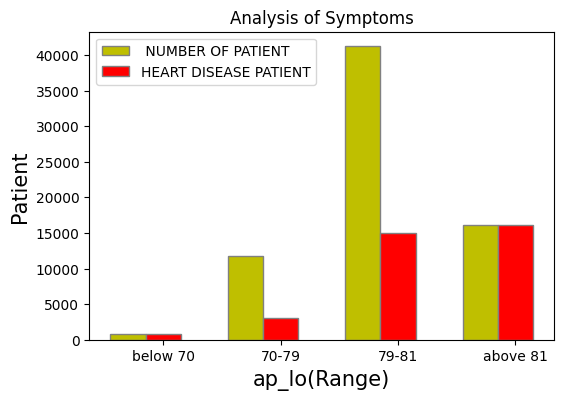

In [ ]:
# Visulization of the featres
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(6, 4))

# set height of bar
total_patient = [801,11816,41208,16174]
heart_patient= [801,3110,15051,16173]


# Set position of bar on X axis
br1 = np.arange(len(total_patient))
br2 = [x + barWidth for x in br1]


# Make the plot
plt.bar(br1, total_patient, color ='y', width = barWidth,
        edgecolor ='grey', label =' NUMBER OF PATIENT')
plt.bar(br2, heart_patient, color ='r', width = barWidth,
        edgecolor ='grey', label ='HEART DISEASE PATIENT')


# Adding Xticks
plt.xlabel('ap_lo(Range)',  fontsize = 15)
plt.ylabel('Patient',  fontsize = 15)
plt.xticks([r + barWidth for r in range(len(total_patient))],
        ['below 70','70-79','79-81','above 81'])
plt.title("Analysis of Symptoms")

plt.legend()
plt.show()


In [ ]:
 #1: normal, 2: above normal, 3: well above normal
#cholesterol
countg=0
tgcountg=0
cholesterol=df["cholesterol"]
cardio=df["cardio"]
for i in range(len(df)):
    if cholesterol[i]==1:
        countg=countg+1
        if cardio[i]==1:
            tgcountg=tgcountg+1
    #    print("i")


print(f"{countg}   patient cholesterol  in Normal range and heart disease patient:{tgcountg}")
p1g=(tgcountg/countg)*100
print(f"{round(p1g)}%  Patient have heart disease problem")
print("_____________________________________________________")
count1g=0
tg1countg=0
cardio=df["cardio"]

for i in range(len(df)):
    if cholesterol[i]==2:
        count1g=count1g+1
        if cardio[i]==1:
            tg1countg=tg1countg+1
    #    print("i")


print(f"{count1g} patient cholesterol in above normal range and heart disease patient:{tg1countg}")
p2g=(tg1countg/count1g)*100
print(f"{round(p2g)}%  Patient have heart disease problem")
print("________________________________________________________")
count2g=0
tg2countg=0
for i in range(len(df)):
    if cholesterol[i]==3:
        count2g=count2g+1
        if cardio[i]==1:
            tg2countg=tg2countg+1
    #    print("i")


print(f"{count2g}  patient cholesterol in well above normal range and heart disease patient:{tg2countg}")
p2g=(tg2countg/count2g)*100
print(f"{round(p2g)}% Patient have heart disease problem")




52139   patient cholesterol  in Normal range and heart disease patient:22938
44%  Patient have heart disease problem
_____________________________________________________
9499 patient cholesterol in above normal range and heart disease patient:5726
60%  Patient have heart disease problem
________________________________________________________
8361  patient cholesterol in well above normal range and heart disease patient:6471
77% Patient have heart disease problem


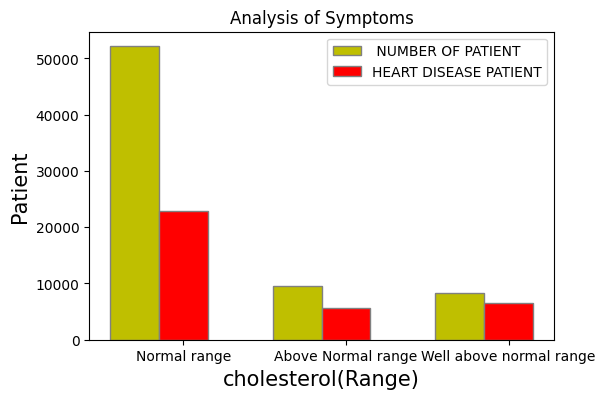

In [ ]:
# Visulization of the featres
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(6, 4))

# set height of bar
total_patient = [52139,9499,8361]
heart_patient= [22938,5726,6471]


# Set position of bar on X axis
br1 = np.arange(len(total_patient))
br2 = [x + barWidth for x in br1]


# Make the plot
plt.bar(br1, total_patient, color ='y', width = barWidth,
        edgecolor ='grey', label =' NUMBER OF PATIENT')
plt.bar(br2, heart_patient, color ='r', width = barWidth,
        edgecolor ='grey', label ='HEART DISEASE PATIENT')


# Adding Xticks
plt.xlabel('cholesterol(Range)',  fontsize = 15)
plt.ylabel('Patient',  fontsize = 15)
plt.xticks([r + barWidth for r in range(len(total_patient))],
        ['Normal range','Above Normal range','Well above normal range'])
plt.title("Analysis of Symptoms")

plt.legend()
plt.show()


In [ ]:
# 1: normal, 2: above normal, 3: well above normal
#gluc
countg=0
tgcountg=0
gluc=df["gluc"]
cardio=df["cardio"]
for i in range(len(df)):
    if gluc[i]==1:
        countg=countg+1
        if cardio[i]==1:
            tgcountg=tgcountg+1
    #    print("i")


print(f"{countg}   patient gluc  in Normal range and heart disease patient:{tgcountg}")
p1g=(tgcountg/countg)*100
print(f"{round(p1g)}%  Patient have heart disease problem")
print("_____________________________________________________")
count1g=0
tg1countg=0
cardio=df["cardio"]

for i in range(len(df)):
    if gluc[i]==2:
        count1g=count1g+1
        if cardio[i]==1:
            tg1countg=tg1countg+1
    #    print("i")


print(f"{count1g} patient gluc in above normal range and heart disease patient:{tg1countg}")
p2g=(tg1countg/count1g)*100
print(f"{round(p2g)}%  Patient have heart disease problem")
print("________________________________________________________")
count2g=0
tg2countg=0
for i in range(len(df)):
    if gluc[i]==3:
        count2g=count2g+1
        if cardio[i]==1:
            tg2countg=tg2countg+1
    #    print("i")


print(f"{count2g}  patient gluc in well above normal range and heart disease patient:{tg2countg}")
p2g=(tg2countg/count2g)*100
print(f"{round(p2g)}% Patient have heart disease problem")




54657   patient gluc  in Normal range and heart disease patient:29588
54%  Patient have heart disease problem
_____________________________________________________
4276 patient gluc in above normal range and heart disease patient:2596
61%  Patient have heart disease problem
________________________________________________________
4603  patient gluc in well above normal range and heart disease patient:2951
64% Patient have heart disease problem


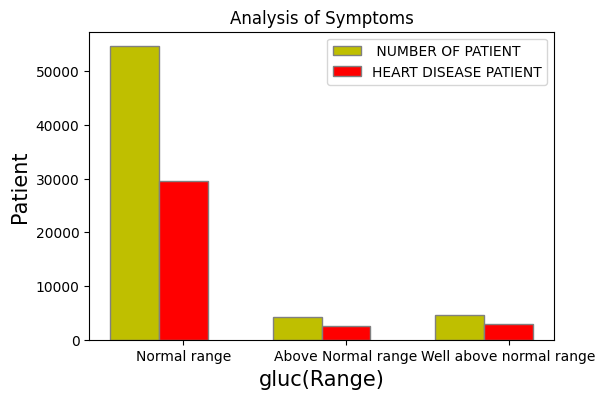

In [ ]:
# Visulization of the featres
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(6, 4))

# set height of bar
total_patient = [54657,4276,4603]
heart_patient= [29588,2596,2951]


# Set position of bar on X axis
br1 = np.arange(len(total_patient))
br2 = [x + barWidth for x in br1]


# Make the plot
plt.bar(br1, total_patient, color ='y', width = barWidth,
        edgecolor ='grey', label =' NUMBER OF PATIENT')
plt.bar(br2, heart_patient, color ='r', width = barWidth,
        edgecolor ='grey', label ='HEART DISEASE PATIENT')


# Adding Xticks
plt.xlabel('gluc(Range)',  fontsize = 15)
plt.ylabel('Patient',  fontsize = 15)
plt.xticks([r + barWidth for r in range(len(total_patient))],
        ['Normal range','Above Normal range','Well above normal range'])
plt.title("Analysis of Symptoms")

plt.legend()
plt.show()


In [ ]:

#smoke
countg=0
tgcountg=0
smoke=df["smoke"]
cardio=df["cardio"]
for i in range(len(df)):
    if smoke[i]==1:
        countg=countg+1
        if cardio[i]==1:
            tgcountg=tgcountg+1
    #    print("i")


print(f"{countg}   patient  those  smoke  and heart disease patient:{tgcountg}")
p1g=(tgcountg/countg)*100
print(f"{round(p1g)}%  Patient have heart disease problem")
print("_____________________________________________________")
count1g=0
tg1countg=0
cardio=df["cardio"]

for i in range(len(df)):
    if smoke[i]==0:
        count1g=count1g+1
        if cardio[i]==1:
            tg1countg=tg1countg+1
    #    print("i")


print(f"{count1g} patient  those not smoke  and heart disease patient:{tg1countg}")
p2g=(tg1countg/count1g)*100
print(f"{round(p2g)}%  Patient have heart disease problem")




16798   patient  those  smoke  and heart disease patient:14723
88%  Patient have heart disease problem
_____________________________________________________
53201 patient  those not smoke  and heart disease patient:20412
38%  Patient have heart disease problem


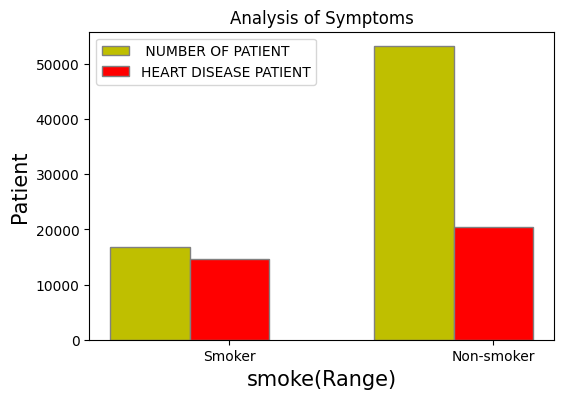

In [ ]:
# Visulization of the featres
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(6, 4))

# set height of bar
total_patient = [16798,53201]
heart_patient= [14723,20412]


# Set position of bar on X axis
br1 = np.arange(len(total_patient))
br2 = [x + barWidth for x in br1]


# Make the plot
plt.bar(br1, total_patient, color ='y', width = barWidth,
        edgecolor ='grey', label =' NUMBER OF PATIENT')
plt.bar(br2, heart_patient, color ='r', width = barWidth,
        edgecolor ='grey', label ='HEART DISEASE PATIENT')


# Adding Xticks
plt.xlabel('smoke(Range)',  fontsize = 15)
plt.ylabel('Patient',  fontsize = 15)
plt.xticks([r + barWidth for r in range(len(total_patient))],
        ['Smoker','Non-smoker'])
plt.title("Analysis of Symptoms")

plt.legend()
plt.show()


In [ ]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_lo', 'ap_hi', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
x=df.drop([ 'gender', 'height','ap_hi', 'alco', 'active', 'cardio'],axis=1)
x

,age,weight,ap_lo,cholesterol,gluc,smoke
0,50,62.000000,78.0,1,1,0
1,55,85.000000,90.0,3,1,1
2,51,64.000000,70.0,3,1,1
3,48,82.000000,100.0,3,1,1
4,47,56.000000,60.0,3,1,1
...,...,...,...,...,...,...
69994,52,76.000000,78.0,1,1,1
69995,61,117.393171,90.0,2,2,0
69996,52,105.000000,90.0,3,1,0
69997,61,72.000000,80.0,1,2,0


In [ ]:
y=df.iloc[:,11:]
y

,cardio
0,0
1,1
2,1
3,1
4,1
...,...
69994,0
69995,1
69996,1
69997,1
